In [ ]:
"""LCR+PID_(Z & theta & temp vs time) @ freq"""
from Functions_A import *
from Functions_B import *
import datetime
import matplotlib.pyplot as plt
start_runtime = time.time()

# connect to the LCR meter
ser_lcr = DeviceConnect('/dev//cu.usbserial-A94IP9Y2')  # LCR Meter
ser_cn740 = DeviceConnect_CN740('/dev/cu.usbserial-BG00XWYD')  # Omega CN740 (RS-485)

"""Experiment"""
# mainReadings = ["R", "C", "L", "Z"]   (Ohm, H, C, Ohm) 
# minorReadings = ["X", "D", "Q", "THR" (θ), "ESR"] (Ohm, None, None, deg, Ohm) 
mainReadings = ['Z'] # can add multiple readings
minorReadings = ['THR'] # can add multiple readings
voltage = 1 # AC voltage (V)
biasVoltage = 0 # DC bias voltage. set to None if no bias is needed. 
numMeasurements = 3 

#chamber v7.3 dimensions
height = 34 # mm
ir = 4.1 # mm
area = np.pi*ir**2 # mm^2     
area = round(area, 2)
thickness = height  # mm
material = 'paraffin wax'


"""Added for Experiment2"""
freq_fixed = 10000 # Hz
set_temp = 80 # SV in degC
exptime = 30 # seconds

try:    
    # material = input('Material? ')
    params = [material, mainReadings, minorReadings]
    info = f', Area, {area}, mm^2, Thickness, {thickness}, mm, voltage, {voltage}, V, n={numMeasurements}, freq_fixed, {freq_fixed}, Hz'
    dataFrame = Experiment2(
        ser_lcr, freq_fixed, mainReadings, minorReadings, voltage, biasVoltage, numMeasurements, ser_cn740, set_temp, exptime)

    DataExport2(params, dataFrame, info)

except Exception as e:
    print(f'Test Aborted: {e}')
    if 'dataFrame' in locals():
        info = f', Area, {area}, mm^2, Thickness, {thickness}, mm, voltage, {voltage}, V, n={numMeasurements}, freq_fixed, {freq_fixed}, Hz'
        DataExport2(params, dataFrame, info)
        print("!!! Partial data saved.")

finally:
    DeviceDisconnect(ser_lcr)
    DeviceDisconnect(ser_cn740)

end_runtime = time.time()
print(f"Total runtime = {round(end_runtime - start_runtime, 2)} seconds")

# LCRCommander(ser_lcr, 'SYST:REM') # remote mode
# LCRCommander(ser_lcr, 'SYST:LOC') # local mode

    Time (s)  PV (degC)  SV (degC)        Z Avg.        Z Std.  Z-THR Avg.  \
0        0.0       23.6       80.0  1.468310e+07  16832.706259  -93.923133   
1        1.5       23.7       80.0  1.465297e+07  23563.436837  -94.176600   
2        3.1       23.9       80.0  1.463367e+07  21710.570902  -94.095967   
3        4.7       23.9       80.0  1.463107e+07   3331.999733  -94.195667   
4        6.3       24.1       80.0  1.464453e+07  15044.895775  -94.169867   
5        7.9       24.2       80.0  1.465737e+07  27621.770802  -94.062600   
6        9.5       24.2       80.0  1.464127e+07  16822.471743  -94.038267   
7       11.1       24.2       80.0  1.463807e+07  13373.190428  -94.258700   
8       12.7       24.2       80.0  1.465280e+07  44146.649552  -94.120067   
9       14.3       24.2       80.0  1.464257e+07  19811.837090  -94.144767   
10      15.9       24.0       80.0  1.463330e+07  24617.473469  -94.403633   
11      17.5       23.9       80.0  1.462323e+07  12258.421142  

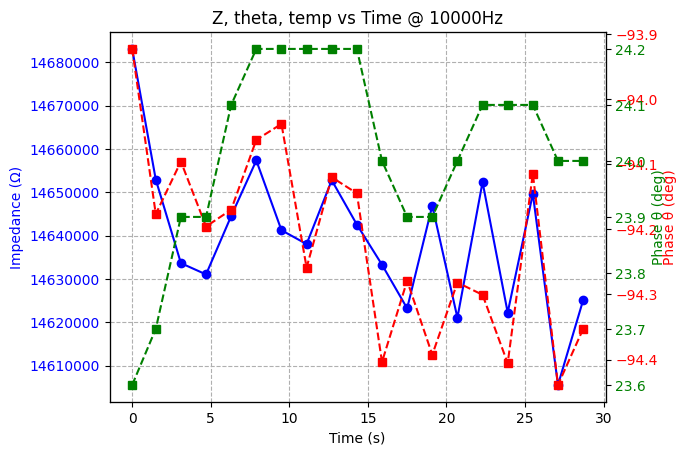

In [4]:
fig, ax1 = plt.subplots()

# Left Y-axis (Major param)
ax1.plot(dataFrame['Time (s)'], dataFrame['Z Avg.'], marker='o', linestyle='-', color='blue', label='Impedance (Ω)')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Impedance (Ω)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.ticklabel_format(style='plain', axis='y')

# Right y-axis (Minor param)
ax2 = ax1.twinx()
ax2.plot(dataFrame['Time (s)'], dataFrame['Z-THR Avg.'], marker='s', linestyle='--', color='red', label='Phase θ (deg)')
ax2.set_ylabel('Phase θ (deg)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Right y-axis (PV)
ax2 = ax1.twinx()
ax2.plot(dataFrame['Time (s)'], dataFrame['PV (degC)'], marker='s', linestyle='--', color='green', label='Temperature (degC)')
ax2.set_ylabel('Phase θ (deg)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

ax1.grid(True, which='both', ls='--')
plt.title(f'Z, theta, temp vs Time @ {freq_fixed}Hz')
plt.show()

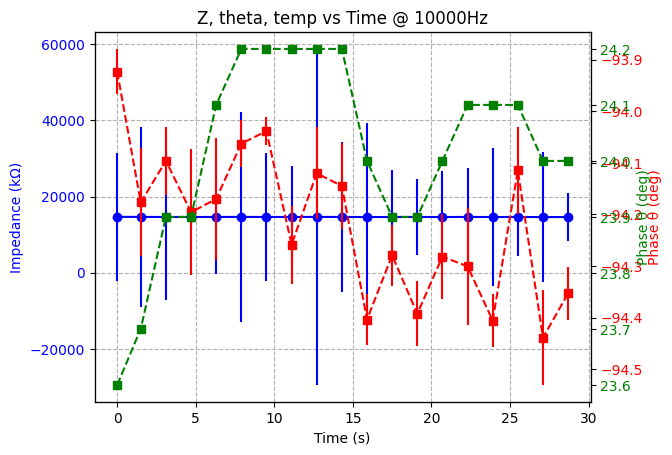

In [5]:
fig, ax1 = plt.subplots()

# Left Y-axis (Major param)
ax1.errorbar(
    dataFrame['Time (s)'], dataFrame['Z Avg.']/1000, yerr=dataFrame['Z Std.'],
    fmt='o-', color='blue')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Impedance (kΩ)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Right y-axis (Minor param)
ax2 = ax1.twinx()
ax2.errorbar(
    dataFrame['Time (s)'], dataFrame['Z-THR Avg.'], yerr=dataFrame['Z-THR Std.'],
    fmt='s--', color='red')
ax2.set_ylabel('Phase θ (deg)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Right y-axis (PV)
ax2 = ax1.twinx()
ax2.plot(dataFrame['Time (s)'], dataFrame['PV (degC)'], marker='s', linestyle='--', color='green', label='Temperature (degC)')
ax2.set_ylabel('Phase θ (deg)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# 
ax1.grid(True, which='both', ls='--')
plt.title(f'Z, theta, temp vs Time @ {freq_fixed}Hz')
plt.show()